In [8]:
#!pip install opendatasets
!pip install pandas
#!pip install db-sqlite3

In [14]:
#import opendatasets as od
import pandas as pd
import seaborn as sns

#od.download("https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aleksandribryanov
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda


100%|██████████| 5.48M/5.48M [00:00<00:00, 7.54MB/s]


In [15]:
file = "black_friday.csv"
data = pd.read_csv(file)

# 1. Общие сведения:


In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [19]:
data.shape

(550068, 12)

In [20]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# 2. Пустые значения


In [21]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [22]:
data.isnull().sum().sum()

556885

<Axes: >

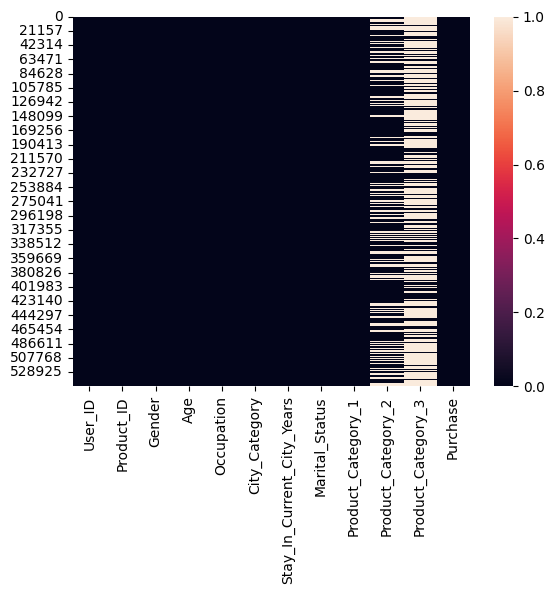

In [23]:
sns.heatmap(data.isnull())

# 3. Дубликаты

In [25]:
data.duplicated().sum()

0

# 4. Переименуем некоторые столбцы

In [26]:
data.rename(columns={'User_ID':'UserID','Product_ID':'ProductID','Product_Category_1':'product1','Product_Category_2':'product2','Product_Category_3':'product3','Marital_Status':'maritial','Stay_In_Current_City_Years':'city'},inplace=True)
data.head(3)

,UserID,ProductID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


# 5. Уберем лишние стобцы

In [28]:
data.drop(['ProductID'], inplace=True, axis='columns')

KeyError: "['ProductID'] not found in axis"

In [29]:
data.head(3)

,UserID,Gender,Age,Occupation,City_Category,city,maritial,product1,product2,product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422


# 6. Пройдемся по каждой из колонок

In [33]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [32]:
def cities(value):
  if "+" in value:
    value = value.replace("+", "")
  return int(value)

data['city']=data['city'].apply(cities)

TypeError: argument of type 'int' is not iterable

In [34]:
data['city'].unique()

array([2, 4, 3, 1, 0])

In [35]:
data['UserID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [37]:
data['UserID'].dtype

dtype('int64')

In [38]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [39]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [40]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)

data['Age']=data['Age'].apply(ages)

In [41]:
data['Age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

In [42]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [43]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [44]:
data['maritial'].unique()

array([0, 1])

In [45]:
data[['UserID','maritial']].tail()

,UserID,maritial
550063,1006033,1
550064,1006035,0
550065,1006036,1
550066,1006038,0
550067,1006039,1


In [46]:
(data['product2'].isnull().sum() / len(data)) * 100

31.56664266963357